# Fraud detection of credit card transaction

Based on dataset of credit card transaction, we are going to build a classification model to predict exceptional trasaction behavior.


# Data preparation

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [3]:
df = pd.read_csv("creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Normalization

In [4]:
data=df
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Distribtuion of Classification label

Text(0, 0.5, 'Frequency')

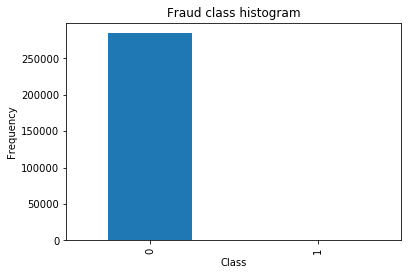

In [5]:
count_classes = df.Class.value_counts()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Undersampling for imbalanced classification

In [7]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

# getting the number and indexes of samples marked as fraud
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# getting the number of samples marked as normal
normal_indices = data[data.Class == 0].index

# randomly pick samples marked as normal in a size as much as the number of samples marked as fraud
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# merging the indexes of all the sample
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# getting data according to the indexed we got above
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

print("The proportion of normal samples in under sample: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("The proportion of fraud samples in under sample: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("The proportion of under saple of the entire dataset: ", len(under_sample_data))

The proportion of normal samples in under sample:  0.5
The proportion of fraud samples in under sample:  0.5
The proportion of under saple of the entire dataset:  984


## Dataset segmentation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)



print("The number of original training dataset: ", len(X_train))
print("The number of original testing dataset: ", len(X_test))
print("The number of original dataset: ", len(X_train)+len(X_test))

# 下采样数据集进行划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("------------")
print("The number of undersampling training dataset: ", len(X_train_undersample))
print("The number of undersampling testing dataset:: ", len(X_test_undersample))
print("The number of undersampling dataset: ", len(X_train_undersample)+len(X_test_undersample))

The number of original training dataset:  199364
The number of original testing dataset:  85443
The number of original dataset:  284807
------------
The number of undersampling training dataset:  688
The number of undersampling testing dataset::  296
The number of undersampling dataset:  984


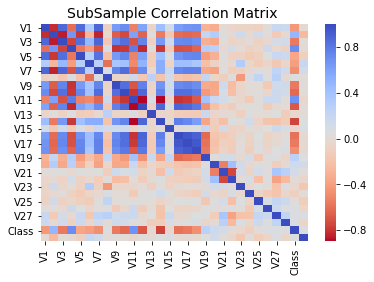

In [14]:
sub_sample_corr = under_sample_data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

## Logistic Regression
- Cross validation: Kfold , default K=5
- Regularization penalty parameters [0.01,0.05,0.1,1,10,100]

In [37]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 
    c_param_range = [0.01,0.05,0.1,1,10,100]
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    
#for different regularization penalty parameters applying cross validation
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('Regularization penalty parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            #define LR model
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver="liblinear")

            # train LR model
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # use the testing dataset to get predicted results.
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # calculate recall score
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': Recall score = ', recall_acc)

        # calculate average 
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Average recall score ', np.mean(recall_accs))
        print('')
        
    #find the best parameter
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    
    print('*********************************************************************************')
    print('The best parameter for LR model = ', best_c)
    print('*********************************************************************************')
    
    return best_c
    

In [38]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
Regularization penalty parameter:  0.01
-------------------------------------------

Iteration  0 : Recall score =  0.9315068493150684
Iteration  1 : Recall score =  0.9178082191780822
Iteration  2 : Recall score =  1.0
Iteration  3 : Recall score =  0.972972972972973
Iteration  4 : Recall score =  0.9545454545454546

Average recall score  0.9553666992023157

-------------------------------------------
Regularization penalty parameter:  0.05
-------------------------------------------

Iteration  0 : Recall score =  0.8493150684931506
Iteration  1 : Recall score =  0.863013698630137
Iteration  2 : Recall score =  0.9491525423728814
Iteration  3 : Recall score =  0.918918918918919
Iteration  4 : Recall score =  0.8939393939393939

Average recall score  0.8948679244708962

-------------------------------------------
Regularization penalty parameter:  0.1
-------------------------------------------

Iteration  0 : Recall score =  0.8493150684931

## Confusion Matrix

In [39]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

召回率:  0.9319727891156463


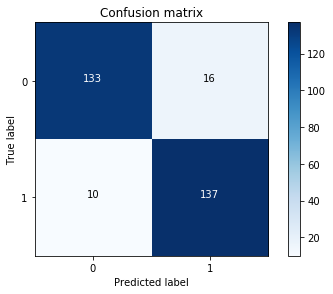

In [41]:

lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

召回率:  0.9115646258503401


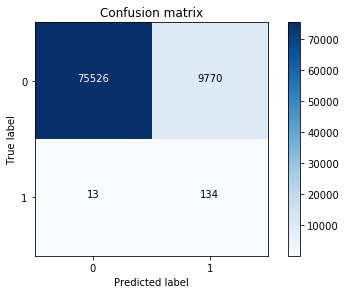

In [43]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

 Threshold impact on results

When threashold=  0.1 ,the recall rate = 1.0
When threashold=  0.2 ,the recall rate = 1.0
When threashold=  0.3 ,the recall rate = 1.0
When threashold=  0.4 ,the recall rate = 0.9727891156462585
When threashold=  0.5 ,the recall rate = 0.9251700680272109
When threashold=  0.6 ,the recall rate = 0.8639455782312925
When threashold=  0.7 ,the recall rate = 0.8231292517006803
When threashold=  0.8 ,the recall rate = 0.7551020408163265
When threashold=  0.9 ,the recall rate = 0.5918367346938775


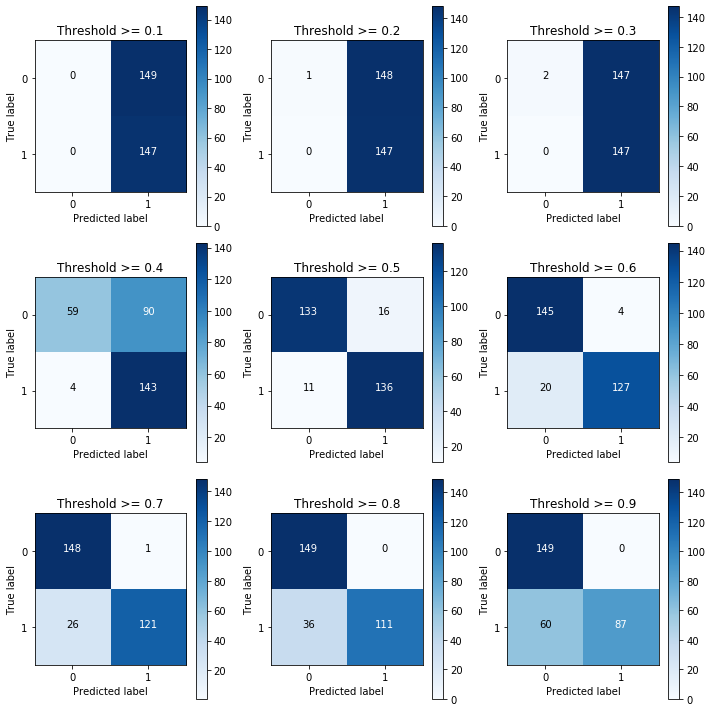

In [48]:
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')


lr.fit(X_train_undersample,y_train_undersample.values.ravel())


y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)


thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1


for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("When threashold= ",i,",the recall rate =", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 